<a href="https://colab.research.google.com/github/financieras/ai/blob/main/logistic_regression/jupyter/normalizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normalizar dataset
Partimos de un archivo CSV y lo limpiamos, seleccionamos columnas y normalizamos.

Los archivos de origen están en Drive y son:
- 'datasets/dataset_train.csv'
- 'datasets/dataset_test.csv'

Los archivos están en Google Drive por lo que lo leemos y construimos un DataFrame.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Ruta al archivo en Google Drive
input_file = '/content/drive/My Drive/datasets/dataset_train.csv'

# Leer el archivo CSV y crear el DataFrame
df = pd.read_csv(input_file)

# Mostrar información sobre las columnas del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Index                          1600 non-null   int64  
 1   Hogwarts House                 1600 non-null   object 
 2   First Name                     1600 non-null   object 
 3   Last Name                      1600 non-null   object 
 4   Birthday                       1600 non-null   object 
 5   Best Hand                      1600 non-null   object 
 6   Arithmancy                     1566 non-null   float64
 7   Astronomy                      1568 non-null   float64
 8   Herbology                      1567 non-null   float64
 9   Defense Against the Dark Arts  1569 non-null   float64
 10  Divination                     1561 non-null   float64
 11  Muggle Studies                 1565 non-null   float64
 12  Ancient Runes                  1565 non-null   f

In [3]:
# Borrar la columna 'Astronomy'
df = df.drop(columns=['Astronomy'])

In [4]:
# Convert 'Birthday' to datetime format
df['Birthday'] = pd.to_datetime(df['Birthday'])

# Convert 'Best Hand' to a binary variable (0 for Left, 1 for Right)
df['Best Hand'] = df['Best Hand'].map({'Left': 0, 'Right': 1})

# Reset the index to a continuous sequence
df = df.reset_index(drop=True)

# Remove the original 'Index' column if it exists
if 'Index' in df.columns:
    df = df.drop('Index', axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Hogwarts House                 1600 non-null   object        
 1   First Name                     1600 non-null   object        
 2   Last Name                      1600 non-null   object        
 3   Birthday                       1600 non-null   datetime64[ns]
 4   Best Hand                      1600 non-null   int64         
 5   Arithmancy                     1566 non-null   float64       
 6   Herbology                      1567 non-null   float64       
 7   Defense Against the Dark Arts  1569 non-null   float64       
 8   Divination                     1561 non-null   float64       
 9   Muggle Studies                 1565 non-null   float64       
 10  Ancient Runes                  1565 non-null   float64       
 11  History of Magic 

## Normalización
Es crucial usar EXACTAMENTE los mismos parámetros de normalización (media y desviación estándar) que se usen para los datos de entrenamiento cuando se aplique la normalización a los datos de test. No se deben calcular nuevos parámetros con los datos de test.

In [5]:
# Calculate age based on the maximum date in Birthday column
df['Birthday'] = pd.to_datetime(df['Birthday'])
reference_date = df['Birthday'].max()
df['Age'] = (reference_date - df['Birthday']).dt.days / 365.25

# Remove unnecessary columns
columns_to_drop = ['First Name', 'Last Name', 'Birthday']
df = df.drop(columns=columns_to_drop)

# Select numerical columns to normalize (including Age which is already float64)
columns_to_normalize = df.select_dtypes(include=['float64']).columns.tolist()

# Function to normalize using mean and standard deviation
def normalize(column, mean=None, std=None):
    """
    Normaliza una columna usando media y desviación estándar

    Parámetros:
    column: columna a normalizar
    mean: media preexistente (opcional)
    std: desviación estándar preexistente (opcional)

    Retorna:
    Si mean y std son None:
        column_normalized, mean, std
    Si mean y std son proporcionados:
        column_normalized
    """
    if mean is None or std is None:
        mean = column.mean()
        std = column.std()
        return (column - mean) / std, mean, std
    return (column - mean) / std

# Diccionario para guardar los parámetros de normalización
normalization_params = {}

# Aplicar normalización y guardar parámetros
for column in columns_to_normalize:
    df[column], mean, std = normalize(df[column])
    normalization_params[column] = {'mean': mean, 'std': std}


# Apply one-hot encoding for Hogwarts House
df = pd.get_dummies(df, columns=['Hogwarts House'], prefix='House', dtype=float)

# Convert int values in 'Best Hand' column to float64 values
df['Best Hand'] = df['Best Hand'].astype(float)


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Best Hand                      1600 non-null   float64
 1   Arithmancy                     1566 non-null   float64
 2   Herbology                      1567 non-null   float64
 3   Defense Against the Dark Arts  1569 non-null   float64
 4   Divination                     1561 non-null   float64
 5   Muggle Studies                 1565 non-null   float64
 6   Ancient Runes                  1565 non-null   float64
 7   History of Magic               1557 non-null   float64
 8   Transfiguration                1566 non-null   float64
 9   Potions                        1570 non-null   float64
 10  Care of Magical Creatures      1560 non-null   float64
 11  Charms                         1600 non-null   float64
 12  Flying                         1600 non-null   f

In [6]:
# Remove columns
reduce_columns = ['Arithmancy', 'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic', 'Transfiguration', 'Care of Magical Creatures']
df = df.drop(columns=reduce_columns)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Best Hand                      1600 non-null   float64
 1   Herbology                      1567 non-null   float64
 2   Defense Against the Dark Arts  1569 non-null   float64
 3   Potions                        1570 non-null   float64
 4   Charms                         1600 non-null   float64
 5   Flying                         1600 non-null   float64
 6   Age                            1600 non-null   float64
 7   House_Gryffindor               1600 non-null   float64
 8   House_Hufflepuff               1600 non-null   float64
 9   House_Ravenclaw                1600 non-null   float64
 10  House_Slytherin                1600 non-null   float64
dtypes: float64(11)
memory usage: 137.6 KB
None


In [7]:
# Drop rows with missing data
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Best Hand                      1508 non-null   float64
 1   Herbology                      1508 non-null   float64
 2   Defense Against the Dark Arts  1508 non-null   float64
 3   Potions                        1508 non-null   float64
 4   Charms                         1508 non-null   float64
 5   Flying                         1508 non-null   float64
 6   Age                            1508 non-null   float64
 7   House_Gryffindor               1508 non-null   float64
 8   House_Hufflepuff               1508 non-null   float64
 9   House_Ravenclaw                1508 non-null   float64
 10  House_Slytherin                1508 non-null   float64
dtypes: float64(11)
memory usage: 141.4 KB
None


## Variables del modelo

In [8]:
import numpy as np

# 1. Crear la matriz y con todas las casas ya que estoy en un caso de clasificación multinomial
y = df[['House_Gryffindor', 'House_Hufflepuff', 'House_Ravenclaw', 'House_Slytherin']]

# 2. Seleccionar las características (X)
X = df[['Best Hand', 'Age', 'Herbology', 'Defense Against the Dark Arts',
        'Potions', 'Charms', 'Flying']]

# 3. Agregar columna de 1's para el término de sesgo (bias)
X = np.c_[np.ones(len(X)), X]

# Convertir a arrays de numpy para operaciones más eficientes
X = np.array(X)
y = np.array(y)

print("\nPrimeros 3 valores de X:")
print(X[:3])

print("\nPrimeros 3 valores de y:")
print(y[:3])


Primeros 3 valores de X:
[[ 1.          0.         -0.65312594  0.87862839  1.01034582 -0.68618295
   1.20455291 -0.50032993]
 [ 1.          1.         -0.33150337 -1.36568958  1.13345528  0.41246159
  -1.00298294 -1.3869281 ]
 [ 1.          0.         -0.36979177  1.26137897  0.7766708   0.88255609
   1.82518401  0.08667263]]

Primeros 3 valores de y:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


## Función Sofmax
- Para un caso multinomial, en lugar de la función sigmoide, es recomendado usar la función softmax.  
- La función sigmoide se usa principalmente para clasificación binaria, mientras que softmax es la generalización para múltiples clases.
- La función softmax se define como:
- softmax(z)_i = exp(z_i) / Σ(exp(z_j))

In [9]:
def softmax(z):
    """
    Calcula la función softmax para clasificación multinomial

    Parámetros:
    z: matriz de forma (n_muestras, n_clases)

    Retorna:
    matriz de probabilidades de forma (n_muestras, n_clases)
    donde cada fila suma 1
    """
    # Restamos el máximo para estabilidad numérica
    # Esto evita desbordamiento en exp() con números grandes
    z_shifted = z - np.max(z, axis=1, keepdims=True)

    # Calculamos exp() de los valores desplazados
    exp_scores = np.exp(z_shifted)

    # Normalizamos dividiendo por la suma
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Podemos probar la función con algunos valores
test_values = np.array([
    [1, 2, 3, 4],
    [2, 1, 0, -1],
    [0, 0, 0, 0]
])
print("Valores de prueba:\n", test_values)
print("\nProbabilidades softmax:\n", softmax(test_values))
print("\nVerificar que cada fila suma 1:\n", np.sum(softmax(test_values), axis=1))

Valores de prueba:
 [[ 1  2  3  4]
 [ 2  1  0 -1]
 [ 0  0  0  0]]

Probabilidades softmax:
 [[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.64391426 0.23688282 0.08714432 0.0320586 ]
 [0.25       0.25       0.25       0.25      ]]

Verificar que cada fila suma 1:
 [1. 1. 1.]


## Función de pérdida
- Para el caso multinomial, necesitamos adaptar la función de pérdida para manejar múltiples clases.
- La función de pérdida logarítmica multinomial también se llama cross-entropy.

In [10]:
def compute_cost(X, y, W):
    """
    Calcula la función de pérdida logarítmica (cross-entropy) para clasificación multinomial

    Parámetros:
    X: matriz de características (incluyendo columna de 1's) de forma (n_muestras, n_características)
    y: matriz one-hot de etiquetas reales de forma (n_muestras, n_clases)
    W: matriz de pesos de forma (n_características, n_clases)

    Retorna:
    J: valor de la función de pérdida
    """
    m = X.shape[0]  # número de muestras

    # Calcular predicciones
    z = np.dot(X, W)  # (n_muestras, n_clases)
    h = softmax(z)    # (n_muestras, n_clases)

    # Calcular pérdida logarítmica
    epsilon = 1e-15  # para evitar log(0)

    # Multiplicación elemento a elemento de y real con log de predicciones
    # y sumamos sobre todas las clases (axis=1) y todas las muestras
    J = -(1/m) * np.sum(y * np.log(h + epsilon))

    return J

# Ejemplo de uso:
# Supongamos que tenemos:
# X: (1508, 8) - 1508 muestras, 7 características + 1 columna de unos
# y: (1508, 4) - etiquetas one-hot para 4 casas
# W: (8, 4) - pesos para cada característica y cada clase

# Inicializar pesos aleatoriamente
W = np.random.randn(X.shape[1], y.shape[1]) * 0.01

# Calcular coste inicial
cost = compute_cost(X, y, W)
print(f"Coste inicial: {cost}")

Coste inicial: 1.381007705676459


Las principales diferencias con la versión binaria son:
- Usamos W (matriz de pesos) en lugar de theta (vector)
- Usamos softmax en lugar de sigmoid
- La fórmula de la pérdida es más simple porque y es one-hot encoding (solo el término positivo importa)
- No necesitamos el término (1-y) porque las etiquetas ya están en formato one-hot

Esta función de pérdida penalizará más cuando el modelo asigne probabilidades bajas a las clases correctas y nos servirá para entrenar el modelo mediante descenso por gradiente.

## Descenso del Gradiente
Para el caso multinomial, necesitamos adaptar la función de descenso del gradiente para manejar la matriz de pesos W en lugar del vector theta.

In [11]:
def gradient_descent_multinomial(X, y, learning_rate=0.1, num_iterations=1000, epsilon=1e-8):
    """
    Implementa el descenso del gradiente para regresión logística multinomial

    Parámetros:
    X: matriz de características (incluyendo columna de 1's) de forma (n_muestras, n_características)
    y: matriz one-hot de etiquetas reales de forma (n_muestras, n_clases)
    learning_rate: tasa de aprendizaje (alpha)
    num_iterations: número máximo de iteraciones
    epsilon: umbral para early stopping

    Retorna:
    W: matriz de pesos optimizada
    cost_history: lista con el valor de la función de pérdida en cada iteración
    """
    # Inicializar matriz de pesos W con valores pequeños aleatorios
    n_features = X.shape[1]
    n_classes = y.shape[1]
    W = np.random.randn(n_features, n_classes) * 0.01

    # Lista para guardar el historial de costes
    cost_history = []

    # Número de muestras
    m = X.shape[0]

    # Calcular coste inicial
    prev_cost = compute_cost(X, y, W)
    cost_history.append(prev_cost)

    # Descenso del gradiente
    for i in range(num_iterations):
        # Calcular predicciones actuales
        z = np.dot(X, W)
        h = softmax(z)

        # Calcular gradiente
        # El gradiente es (1/m) * X^T * (h - y)
        gradient = (1/m) * np.dot(X.T, (h - y))

        # Actualizar pesos
        W = W - learning_rate * gradient

        # Calcular nuevo coste
        current_cost = compute_cost(X, y, W)
        cost_history.append(current_cost)

        # Imprimir progreso cada 1000 iteraciones
        if i % 1000 == 0:
            print(f'Iteración {i}: Coste = {current_cost}')

        # Early stopping
        if abs(prev_cost - current_cost) < epsilon:
            print(f'\nConvergencia alcanzada en la iteración {i}')
            print(f'Diferencia en coste: {abs(prev_cost - current_cost)}')
            break

        prev_cost = current_cost

    return W, cost_history

# Ejemplo de uso:
# W, cost_history = gradient_descent_multinomial(X, y)

Las principales diferencias con la versión binomial son:
- Inicializamos una matriz W en lugar de un vector theta
- El gradiente se calcula usando la fórmula para multinomial: (1/m) * X^T * (h - y)
    - h son las probabilidades softmax
    - La resta (h - y) se hace sobre todas las clases

No necesitamos una función compute_gradient separada, ya que el cálculo es más directo
Todas las operaciones matriciales están adaptadas para manejar múltiples clases

Para hacer predicciones con el modelo entrenado, podrías usar:

In [12]:
def predict(X, W):
    """
    Realiza predicciones usando los pesos aprendidos

    Parámetros:
    X: matriz de características (incluyendo columna de 1's)
    W: matriz de pesos optimizada

    Retorna:
    predicciones: matriz de probabilidades para cada clase
    """
    z = np.dot(X, W)
    return softmax(z)

podemos ejecutarlo así:

Iteración 0: Coste = 1.2833397241762847
Iteración 1000: Coste = 0.11583413883510385
Iteración 2000: Coste = 0.11171849973286227
Iteración 3000: Coste = 0.10984503696738028
Iteración 4000: Coste = 0.10872003758375828
Coste inicial: 1.3737223492348898
Coste final: 0.10792561739643632

Precisión del modelo: 0.9834


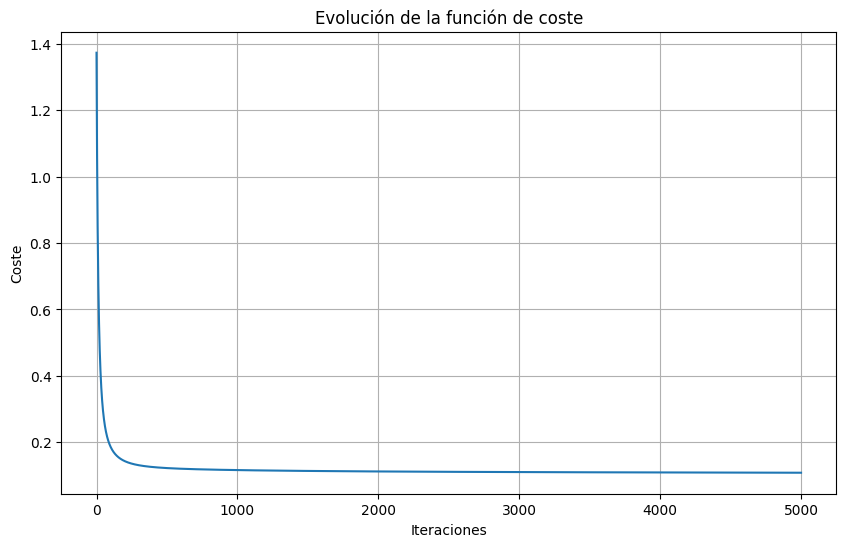

In [13]:
# Hiperparámetros
learning_rate = 0.1
num_iterations = 5_000

# Ejecutar el descenso del gradiente multinomial
W_optimal, cost_history = gradient_descent_multinomial(X, y, learning_rate, num_iterations)

# Imprimir coste inicial y final
print(f"Coste inicial: {cost_history[0]}")
print(f"Coste final: {cost_history[-1]}")

# Hacer predicciones
probabilities = predict(X, W_optimal)

# Obtener la clase predicha
predicted_houses = np.argmax(probabilities, axis=1)
actual_houses = np.argmax(y, axis=1)
accuracy = np.mean(predicted_houses == actual_houses)
print(f"\nPrecisión del modelo: {accuracy:.4f}")

# Visualizar la evolución del coste
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Evolución de la función de coste')
plt.xlabel('Iteraciones')
plt.ylabel('Coste')
plt.grid(True)
plt.show()

# Tratamiento de los datos de test

Primero cargar los datos de test:

In [14]:
# Ruta al archivo en Google Drive para test
input_file_test = '/content/drive/My Drive/datasets/dataset_test.csv'

# Leer el archivo CSV y crear el DataFrame de test
df_test = pd.read_csv(input_file_test)

Aplicar la misma limpieza y transformaciones que hicimos en el conjunto de entrenamiento:

In [15]:
# Borrar la columna 'Astronomy'
df_test = df_test.drop(columns=['Astronomy'])

# Convert 'Birthday' to datetime format
df_test['Birthday'] = pd.to_datetime(df_test['Birthday'])

# Convert 'Best Hand' to a binary variable (0 for Left, 1 for Right)
df_test['Best Hand'] = df_test['Best Hand'].map({'Left': 0, 'Right': 1})

# Reset the index
df_test = df_test.reset_index(drop=True)

# Remove the original 'Index' column if it exists
if 'Index' in df_test.columns:
    df_test = df_test.drop('Index', axis=1)

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Hogwarts House                 0 non-null      float64       
 1   First Name                     400 non-null    object        
 2   Last Name                      400 non-null    object        
 3   Birthday                       400 non-null    datetime64[ns]
 4   Best Hand                      400 non-null    int64         
 5   Arithmancy                     387 non-null    float64       
 6   Herbology                      389 non-null    float64       
 7   Defense Against the Dark Arts  392 non-null    float64       
 8   Divination                     394 non-null    float64       
 9   Muggle Studies                 390 non-null    float64       
 10  Ancient Runes                  392 non-null    float64       
 11  History of Magic   

Calcular la edad usando la misma fecha de referencia que usamos en el entrenamiento:

In [16]:
# Calculate age using the SAME reference date from training
reference_date = df_test['Birthday'].max()  # Debería ser la misma que usamos en training
df_test['Age'] = (reference_date - df_test['Birthday']).dt.days / 365.25

# Remove unnecessary columns
columns_to_drop = ['First Name', 'Last Name', 'Birthday', 'Hogwarts House']
df_test = df_test.drop(columns=columns_to_drop)

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Best Hand                      400 non-null    int64  
 1   Arithmancy                     387 non-null    float64
 2   Herbology                      389 non-null    float64
 3   Defense Against the Dark Arts  392 non-null    float64
 4   Divination                     394 non-null    float64
 5   Muggle Studies                 390 non-null    float64
 6   Ancient Runes                  392 non-null    float64
 7   History of Magic               389 non-null    float64
 8   Transfiguration                389 non-null    float64
 9   Potions                        390 non-null    float64
 10  Care of Magical Creatures      392 non-null    float64
 11  Charms                         400 non-null    float64
 12  Flying                         400 non-null    flo

Eliminar las mismas columnas que eliminamos en el entrenamiento:

In [17]:
# Remove columns
reduce_columns = ['Arithmancy', 'Divination', 'Muggle Studies', 'Ancient Runes',
                 'History of Magic', 'Transfiguration', 'Care of Magical Creatures']
df_test = df_test.drop(columns=reduce_columns)

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Best Hand                      400 non-null    int64  
 1   Herbology                      389 non-null    float64
 2   Defense Against the Dark Arts  392 non-null    float64
 3   Potions                        390 non-null    float64
 4   Charms                         400 non-null    float64
 5   Flying                         400 non-null    float64
 6   Age                            400 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.0 KB
None


Eliminar filas con valores nulos y duplicados:

In [18]:
# Drop rows with missing data
df_test = df_test.dropna()

# Remove duplicate rows
df_test = df_test.drop_duplicates()

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 398
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Best Hand                      372 non-null    int64  
 1   Herbology                      372 non-null    float64
 2   Defense Against the Dark Arts  372 non-null    float64
 3   Potions                        372 non-null    float64
 4   Charms                         372 non-null    float64
 5   Flying                         372 non-null    float64
 6   Age                            372 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.2 KB
None


## Normalización de los datos de test
- Normalizar los datos de test usando los parámetros (media y desviación estándar) que guardamos del conjunto de entrenamiento.
- Esto es crucial porque debemos aplicar exactamente la misma transformación que aplicamos a los datos de entrenamiento.

In [19]:
# Convertir Best Hand a float64 como hicimos en training
df_test['Best Hand'] = df_test['Best Hand'].astype(float)

# Normalizar usando los parámetros guardados de training
for column in df_test.columns:
    if column in normalization_params:
        mean = normalization_params[column]['mean']
        std = normalization_params[column]['std']
        df_test[column] = normalize(df_test[column], mean, std)

print("\nPrimeros 3 registros después de la normalización:")
print(df_test.head(3))


Primeros 3 registros después de la normalización:
   Best Hand  Herbology  Defense Against the Dark Arts   Potions    Charms  \
0        1.0   0.360013                      -1.260955 -0.724744 -0.126065   
1        0.0   0.349486                       0.785819  0.814602  1.375558   
2        0.0  -1.403671                      -0.540051 -1.302330 -1.095106   

     Flying       Age  
0 -0.364411 -1.719458  
1 -0.493877  0.897554  
2  1.825147  0.418949  


## Preparar los datos de test
Necesitaremos preparar los datos en el formato correcto para hacer las predicciones:

In [20]:
# Preparar X_test (agregar columna de 1's para el término de sesgo)
X_test = df_test[['Best Hand', 'Age', 'Herbology', 'Defense Against the Dark Arts',
                  'Potions', 'Charms', 'Flying']]
X_test = np.c_[np.ones(len(X_test)), X_test]
X_test = np.array(X_test)

print("\nForma de X_test:", X_test.shape)


Forma de X_test: (372, 8)


## Predicciones con los datos de test
Ahora podemos usar la función predict que ya teníamos y los pesos óptimos (W_optimal) para hacer las predicciones.

In [21]:
# Hacer predicciones usando los pesos óptimos del entrenamiento
probabilities = predict(X_test, W_optimal)

# Obtener la clase predicha (la casa con mayor probabilidad)
predicted_houses = np.argmax(probabilities, axis=1)

# Convertir los índices a nombres de casas
house_names = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']
predictions = [house_names[idx] for idx in predicted_houses]

# Mostrar algunas predicciones
print("\nPrimeras 5 predicciones:")
for i in range(5):
    print(f"Estudiante {i+1}:")
    print(f"Casa predicha: {predictions[i]}")
    print(f"Probabilidades: Gryffindor: {probabilities[i][0]:.3f}, Hufflepuff: {probabilities[i][1]:.3f}, "
          f"Ravenclaw: {probabilities[i][2]:.3f}, Slytherin: {probabilities[i][3]:.3f}\n")


Primeras 5 predicciones:
Estudiante 1:
Casa predicha: Hufflepuff
Probabilidades: Gryffindor: 0.007, Hufflepuff: 0.985, Ravenclaw: 0.007, Slytherin: 0.001

Estudiante 2:
Casa predicha: Ravenclaw
Probabilidades: Gryffindor: 0.012, Hufflepuff: 0.013, Ravenclaw: 0.944, Slytherin: 0.031

Estudiante 3:
Casa predicha: Gryffindor
Probabilidades: Gryffindor: 0.997, Hufflepuff: 0.001, Ravenclaw: 0.001, Slytherin: 0.002

Estudiante 4:
Casa predicha: Hufflepuff
Probabilidades: Gryffindor: 0.025, Hufflepuff: 0.932, Ravenclaw: 0.034, Slytherin: 0.009

Estudiante 5:
Casa predicha: Slytherin
Probabilidades: Gryffindor: 0.000, Hufflepuff: 0.001, Ravenclaw: 0.000, Slytherin: 0.998



In [25]:
# Crear DataFrame directamente con las predicciones
predictions_df = pd.DataFrame(predictions, columns=['Hogwarts House'])

# Añadir la columna Index como primera columna
predictions_df.insert(0, 'Index', range(len(predictions)))

# Guardar en CSV
predictions_df.to_csv('houses.csv', index=False)

# Verificar el contenido del archivo mostrando las 10 primeras líneas
# Contenido del archivo houses.csv (primeras líneas)
with open('houses.csv', 'r') as file:
    for i, line in enumerate(file):
        if i < 12:  # Solo las primeras 10 líneas
            print(line.strip())  # strip() elimina los saltos de línea extra

Index,Hogwarts House
0,Hufflepuff
1,Ravenclaw
2,Gryffindor
3,Hufflepuff
4,Slytherin
5,Ravenclaw
6,Hufflepuff
7,Ravenclaw
8,Hufflepuff
9,Hufflepuff
10,Slytherin
